$Descripción del proyecto$
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

 ## El dataset incluye los siguientes campos:
 
$'Churn'$ — la cancelación para el mes en cuestión

## Campos de dataset actuales:

## Datos del usuario del mes anterior

$'gender'$.

$'Near_Location'$ — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.

$'Partner'$ — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).

$Promo_friends$ — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).

$'Phone'$ — si el/la usuario/a aportó el número de teléfono.

$'Age'$.

$'Lifetime'$ — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.



## Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:

$'Contract_period'$ — 1 mes, 3 meses, 6 meses o 1 año.

$'Month_to_end_contract'$ — los meses que faltan hasta que expire el contrato.

$'Group_visits'$ — si el/la usuario/a participa en sesiones grupales.

$'Avg_class_frequency_total'$ — frecuencia media de visitas por semana a lo largo de la vida del cliente.

$'Avg_class_frequency_current_month'$ — frecuencia media de visitas por semana durante el mes en curso.

$'Avg_additional_charges_total'$ — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import KMeans

In [2]:
model_fitness=pd.read_csv ('/datasets/gym_churn_us.csv')
model_fitness.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Llevar a cabo el análisis exploratorio de datos (EDA)

In [3]:
model_fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
model_fitness.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
model_fitness.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<AxesSubplot:xlabel='gender', ylabel='count'>

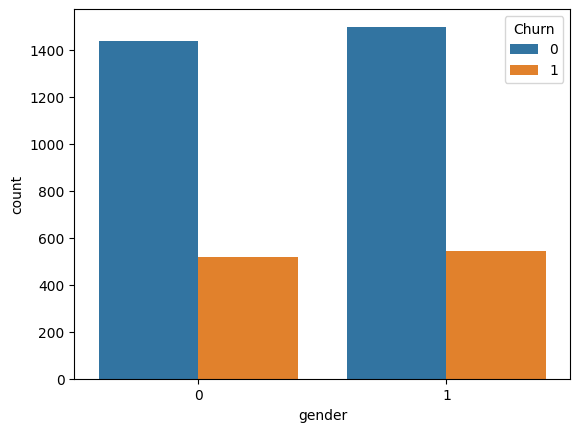

In [6]:


sns.countplot(
            data=model_fitness,
            x='gender',
            hue='Churn',
        )



azul NO CANCELO y se mantuvo en el conteo ,  NARAJA CANCELO.     0 y 1  son los generos

In [7]:
model_fitness.groupby(['gender','Churn']).count()

Near_Location  Partner  Promo_friends  Phone  Contract_period  \
gender Churn                                                                  
0      0               1440     1440           1440   1440             1440   
       1                519      519            519    519              519   
1      0               1499     1499           1499   1499             1499   
       1                542      542            542    542              542   

              Group_visits   Age  Avg_additional_charges_total  \
gender Churn                                                     
0      0              1440  1440                          1440   
       1               519   519                           519   
1      0              1499  1499                          1499   
       1               542   542                           542   

              Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
gender Churn                                                               
0      0                       1440      1440                       1440   
       1                        519       519                        519   
1      0                       1499      1499                       1499   
       1                        542       542                        542   

              Avg_class_frequency_current_month  
gender Churn                                     
0      0                                   1440  
       1                                    519  
1      0                                   1499  
       1                                    542

<AxesSubplot:xlabel='Contract_period', ylabel='Count'>

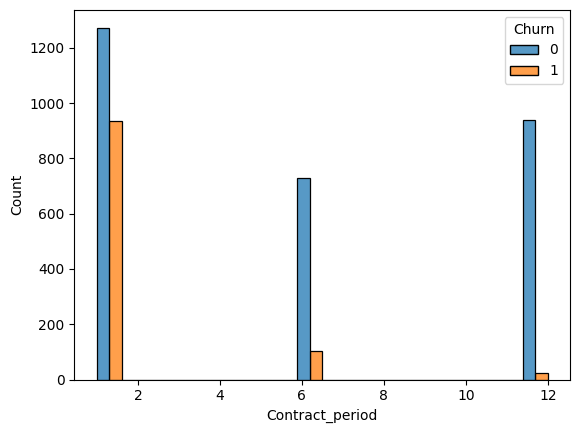

In [8]:




sns.histplot(
            data=model_fitness,
            x='Contract_period',
            hue='Churn',
            multiple='dodge'
        )




naranja cancelo y azul se quedo alo largo del periodo de 12 meses
los clientes fijos fueron en aumento mientras los clientes volatiles disminuyeron o se transformaron en fijos

las cancelaciones que en la grafica se pueden identificar con el color naranja han disminuido al final del año en comparacion del inicio

In [9]:
model_fitness.groupby(['Contract_period','Churn']).count()

gender  Near_Location  Partner  Promo_friends  Phone  \
Contract_period Churn                                                         
1               0        1273           1273     1273           1273   1273   
                1         934            934      934            934    934   
6               0         729            729      729            729    729   
                1         104            104      104            104    104   
12              0         937            937      937            937    937   
                1          23             23       23             23     23   

                       Group_visits   Age  Avg_additional_charges_total  \
Contract_period Churn                                                     
1               0              1273  1273                          1273   
                1               934   934                           934   
6               0               729   729                           729   
                1               104   104                           104   
12              0               937   937                           937   
                1                23    23                            23   

                       Month_to_end_contract  Lifetime  \
Contract_period Churn                                    
1               0                       1273      1273   
                1                        934       934   
6               0                        729       729   
                1                        104       104   
12              0                        937       937   
                1                         23        23   

                       Avg_class_frequency_total  \
Contract_period Churn                              
1               0                           1273   
                1                            934   
6               0                            729   
                1                            104   
12              0                            937   
                1                             23   

                       Avg_class_frequency_current_month  
Contract_period Churn                                     
1               0                                   1273  
                1                                    934  
6               0                                    729  
                1                                    104  
12              0                                    937  
                1                                     23

<AxesSubplot:xlabel='Age', ylabel='Count'>

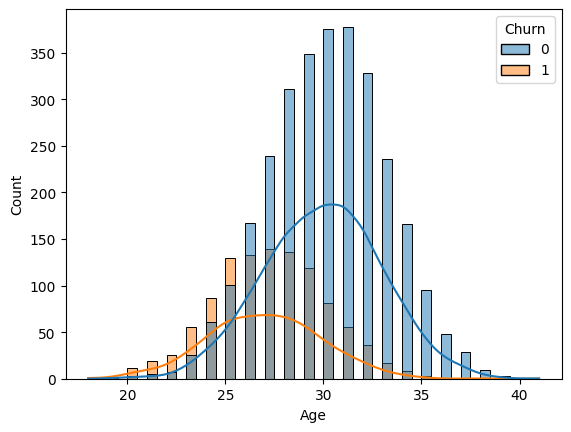

In [10]:


sns.histplot(
            data=model_fitness,
            x='Age',
            hue='Churn',
            kde=True,
)




la edad de los principales clientes esta cercano alos 30 son 376 y abandonaron 81

In [11]:
model_fitness.groupby(['Age','Churn']).count()

gender  Near_Location  Partner  Promo_friends  Phone  \
Age Churn                                                         
18  1           2              2        2              2      2   
19  0           1              1        1              1      1   
    1           1              1        1              1      1   
20  0           3              3        3              3      3   
    1          11             11       11             11     11   
21  0           5              5        5              5      5   
    1          19             19       19             19     19   
22  0           7              7        7              7      7   
    1          26             26       26             26     26   
23  0          26             26       26             26     26   
    1          56             56       56             56     56   
24  0          61             61       61             61     61   
    1          87             87       87             87     87   
25  0         101            101      101            101    101   
    1         130            130      130            130    130   
26  0         167            167      167            167    167   
    1         133            133      133            133    133   
27  0         239            239      239            239    239   
    1         139            139      139            139    139   
28  0         311            311      311            311    311   
    1         136            136      136            136    136   
29  0         349            349      349            349    349   
    1         119            119      119            119    119   
30  0         376            376      376            376    376   
    1          81             81       81             81     81   
31  0         378            378      378            378    378   
    1          56             56       56             56     56   
32  0         328            328      328            328    328   
    1          36             36       36             36     36   
33  0         236            236      236            236    236   
    1          17             17       17             17     17   
34  0         166            166      166            166    166   
    1           8              8        8              8      8   
35  0          95             95       95             95     95   
    1           3              3        3              3      3   
36  0          48             48       48             48     48   
37  0          29             29       29             29     29   
38  0           9              9        9              9      9   
    1           1              1        1              1      1   
39  0           3              3        3              3      3   
41  0           1              1        1              1      1   

           Contract_period  Group_visits  Avg_additional_charges_total  \
Age Churn                                                                
18  1                    2             2                             2   
19  0                    1             1                             1   
    1                    1             1                             1   
20  0                    3             3                             3   
    1                   11            11                            11   
21  0                    5             5                             5   
    1                   19            19                            19   
22  0                    7             7                             7   
    1                   26            26                            26   
23  0                   26            26                            26   
    1                   56            56                            56   
24  0                   61            61                            61   
    1                   87            87                            87   
25  0              

<AxesSubplot:xlabel='Group_visits', ylabel='Count'>

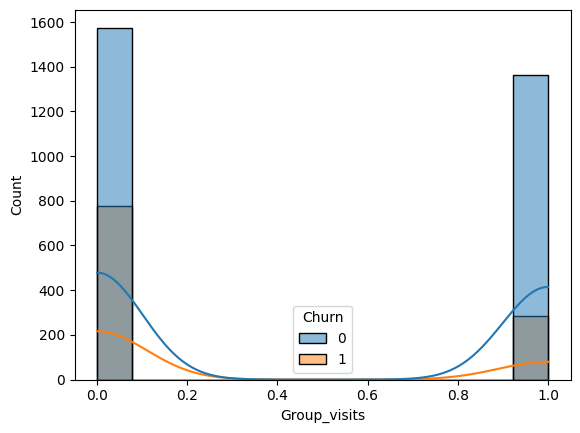

In [12]:



sns.histplot(
            data=model_fitness,
            x='Group_visits',
            hue='Churn',
            kde=True,

)



<AxesSubplot:xlabel='Near_Location', ylabel='Count'>

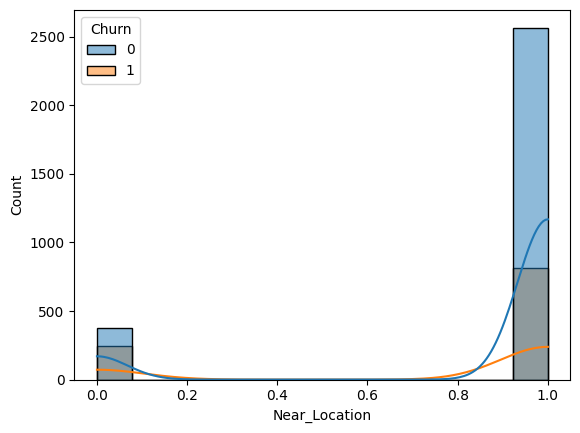

In [13]:

sns.histplot(
            data=model_fitness,
            x='Near_Location',
            hue='Churn',
            kde=True,
)



<AxesSubplot:xlabel='Partner', ylabel='Count'>

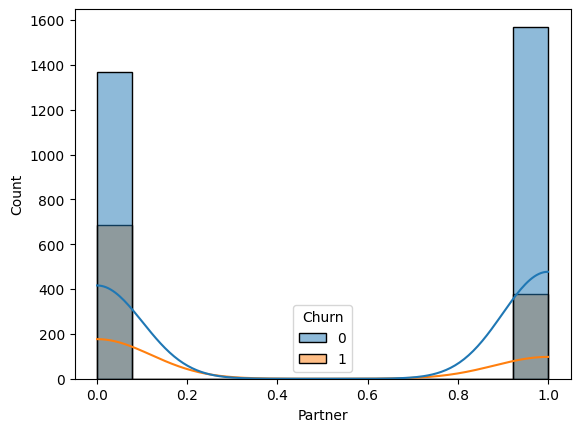

In [14]:

sns.histplot(
            data=model_fitness,
            x='Partner',
            hue='Churn',
            kde=True,
)




<AxesSubplot:xlabel='Promo_friends', ylabel='Count'>

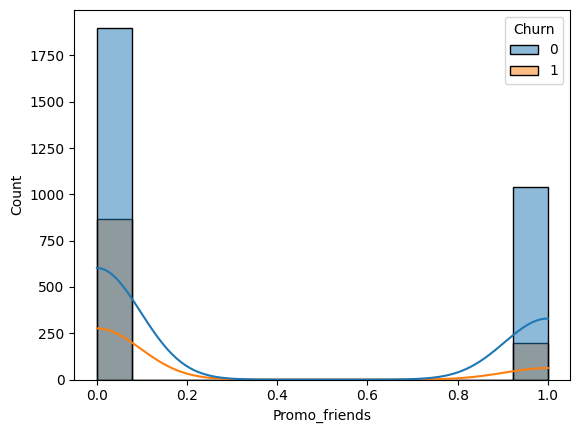

In [15]:

sns.histplot(
            data=model_fitness,
            x='Promo_friends',
            hue='Churn',
            kde=True,

)



<AxesSubplot:xlabel='Phone', ylabel='Count'>

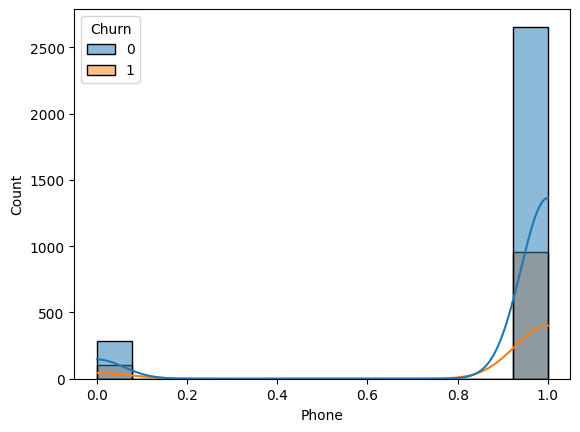

In [16]:
sns.histplot(
            data=model_fitness,
            x='Phone',
            hue='Churn',
            kde=True,
     )

<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Count'>

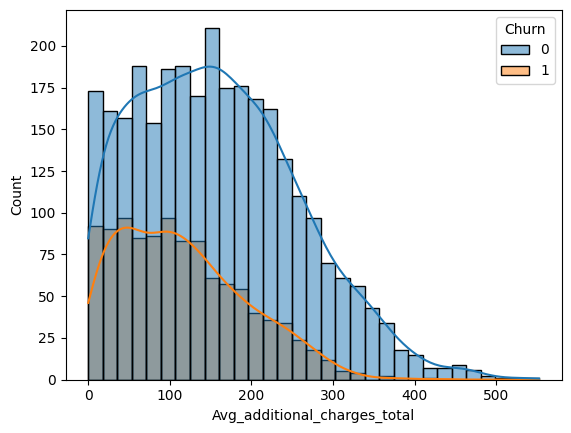

In [17]:

 sns.histplot(
            data=model_fitness,
            x='Avg_additional_charges_total',
            hue='Churn',
            kde=True,
     )


<AxesSubplot:xlabel='Month_to_end_contract', ylabel='Count'>

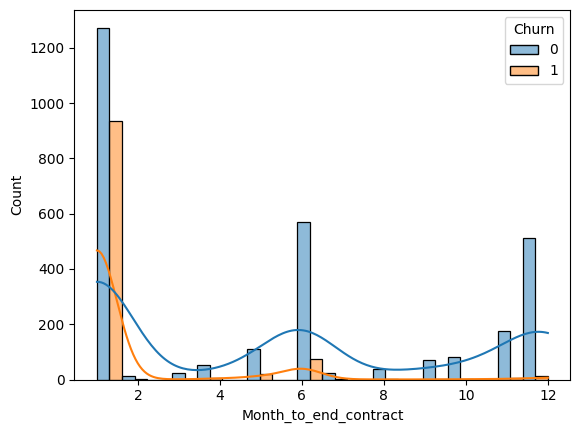

In [18]:





sns.histplot(
            data=model_fitness,
            x='Month_to_end_contract',
            hue='Churn',
            kde=True,
            multiple='dodge'

    )



<AxesSubplot:xlabel='Lifetime', ylabel='Count'>

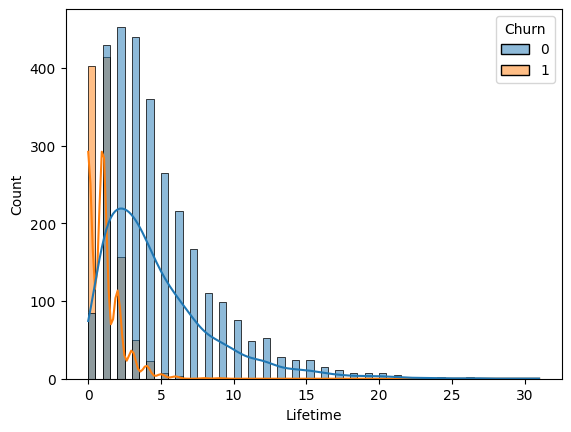

In [19]:

sns.histplot(
            data=model_fitness,
            x='Lifetime',
            hue='Churn',
            kde=True,
     )



<AxesSubplot:xlabel='Avg_class_frequency_total', ylabel='Count'>

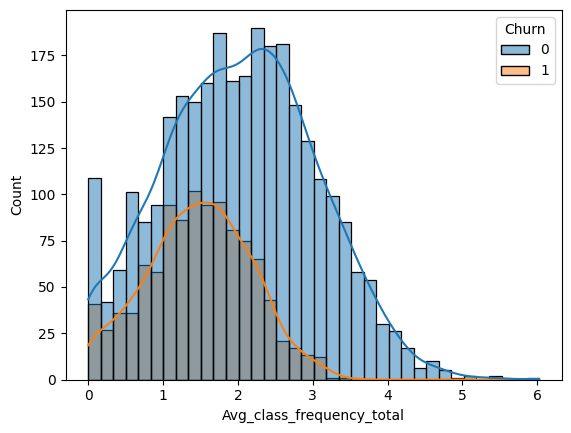

In [20]:
sns.histplot(
            data=model_fitness,
            x='Avg_class_frequency_total',
            hue='Churn',
            kde=True,
     )


<AxesSubplot:xlabel='Avg_class_frequency_current_month', ylabel='Count'>

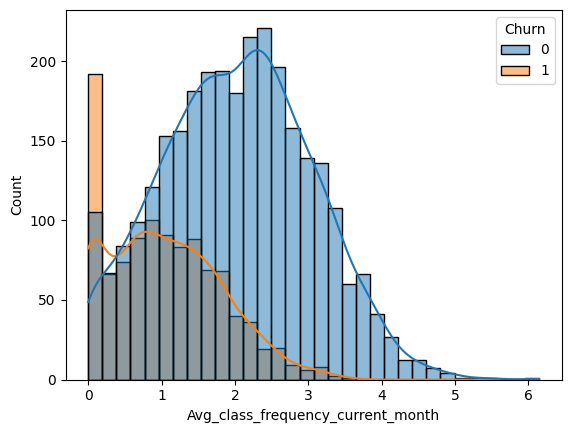

In [21]:
sns.histplot(
            data=model_fitness,
            x='Avg_class_frequency_current_month',
            hue='Churn',
            kde=True,
     )


 gender                             4000 non-null   int64  
  Near_Location                      4000 non-null   int64  
Partner                            4000 non-null   int64  
  Promo_friends                      4000 non-null   int64  
 Phone                              4000 non-null   int64  
Contract_period                    4000 non-null   int64  
 Group_visits                       4000 non-null   int64  
Age                                4000 non-null   int64  
 Avg_additional_charges_total       4000 non-null   float64
  Month_to_end_contract              4000 non-null   float64
 Lifetime                           4000 non-null   int64  
 Avg_class_frequency_total          4000 non-null   float64
Avg_class_frequency_current_month  4000 non-null   float64
 Churn           
          

In [22]:
#Crea una matriz de correlación 
model_fitness.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


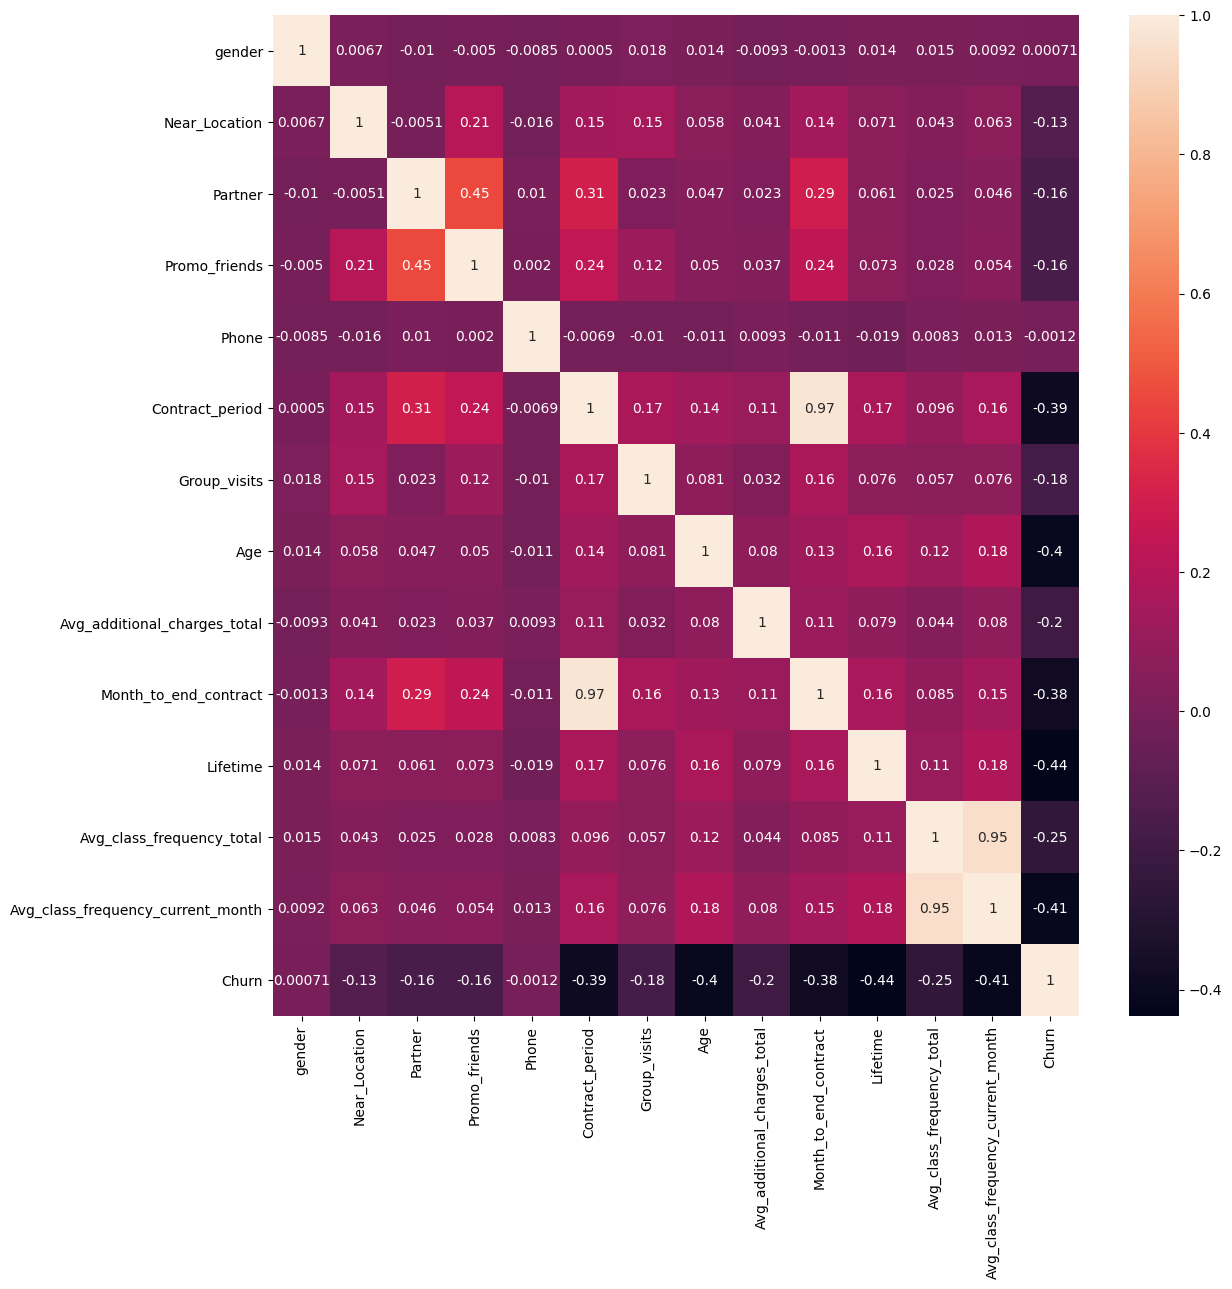

In [23]:
plt.figure(figsize=(13,13))
sns.heatmap(model_fitness.corr(), annot=True)
plt.show()

churn posisoniado en la esquina como lamedida principal para medir las anteriores y siguientes mediciones

 ## Construir un modelo para predecir la cancelación de usuarios

In [24]:
#SEPARAR CARACTERISTICAS(X) DE OBJETIVOS(y)
X=model_fitness.drop(columns=['Churn'])
y=model_fitness['Churn']

In [25]:
#Dividir los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
#Entrena el modelo en el set de entrenamiento con dos métodos(regresión logística)
modelLR=LogisticRegression(max_iter=500, verbose=1, solver= 'liblinear')

In [27]:
modelLR.fit(X_train, y_train)

[LibLinear]iter  1 act 4.137e+02 pre 3.840e+02 delta 5.962e-03 f 2.218e+03 |g| 1.396e+05 CG   1
cg reaches trust region boundary
iter  2 act 4.090e+01 pre 4.031e+01 delta 1.118e-02 f 1.804e+03 |g| 2.038e+04 CG   2
cg reaches trust region boundary
iter  3 act 4.317e+01 pre 4.300e+01 delta 3.671e-02 f 1.764e+03 |g| 4.555e+03 CG   1
cg reaches trust region boundary
iter  4 act 1.000e+02 pre 1.005e+02 delta 6.642e-02 f 1.720e+03 |g| 8.135e+03 CG   2
cg reaches trust region boundary
iter  5 act 1.126e+02 pre 1.131e+02 delta 7.817e-02 f 1.620e+03 |g| 5.423e+03 CG   2
cg reaches trust region boundary
iter  6 act 1.519e+02 pre 1.429e+02 delta 1.304e-01 f 1.508e+03 |g| 6.267e+03 CG   3
cg reaches trust region boundary
iter  7 act 1.017e+02 pre 9.425e+01 delta 1.489e-01 f 1.356e+03 |g| 4.321e+03 CG   2
cg reaches trust region boundary
iter  8 act 1.352e+02 pre 1.258e+02 delta 2.555e-01 f 1.254e+03 |g| 5.632e+03 CG   3
cg reaches trust region boundary
iter  9 act 1.049e+02 pre 9.487e+01 delta 4.4

LogisticRegression(max_iter=500, solver='liblinear', verbose=1)

In [28]:
predicioneslr=modelLR.predict(X_test)

In [29]:
precision_score(y_test, predicioneslr)

0.8638743455497382

In [30]:
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test, predicioneslr))
print('Precision Score for Logistic Regression:', precision_score(y_test, predicioneslr))
print('Recall Score for Logistic Regression:', recall_score(y_test, predicioneslr))

Accuracy Score for Logistic Regression: 0.92625
Precision Score for Logistic Regression: 0.8638743455497382
Recall Score for Logistic Regression: 0.8333333333333334


In [31]:
#Entrena el modelo en el set de entrenamiento con dos métodos(bosque aleatorio)
modelRF=RandomForestClassifier(n_estimators=500,random_state=12345)

In [32]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=12345)

In [33]:
predicionesRF=modelRF.predict(X_test)

In [34]:
precision_score(y_test, predicionesRF)

0.84375

In [35]:

print('Accuracy Score for Random Forest:', accuracy_score(y_test, predicionesRF))
print('Precision Score for Random Forest:', precision_score(y_test, predicionesRF))
print('Recall Score for Random Forest:', recall_score(y_test, predicionesRF))


Accuracy Score for Random Forest: 0.9175
Precision Score for Random Forest: 0.84375
Recall Score for Random Forest: 0.8181818181818182


## Paso 4. Crear clústeres de usuarios/as

In [36]:
#Estandariza los datos.
sc = StandardScaler()
x_sc = sc.fit_transform(model_fitness.drop(columns=['Churn']))

In [37]:
#función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada
linked = linkage(x_sc, method='ward')

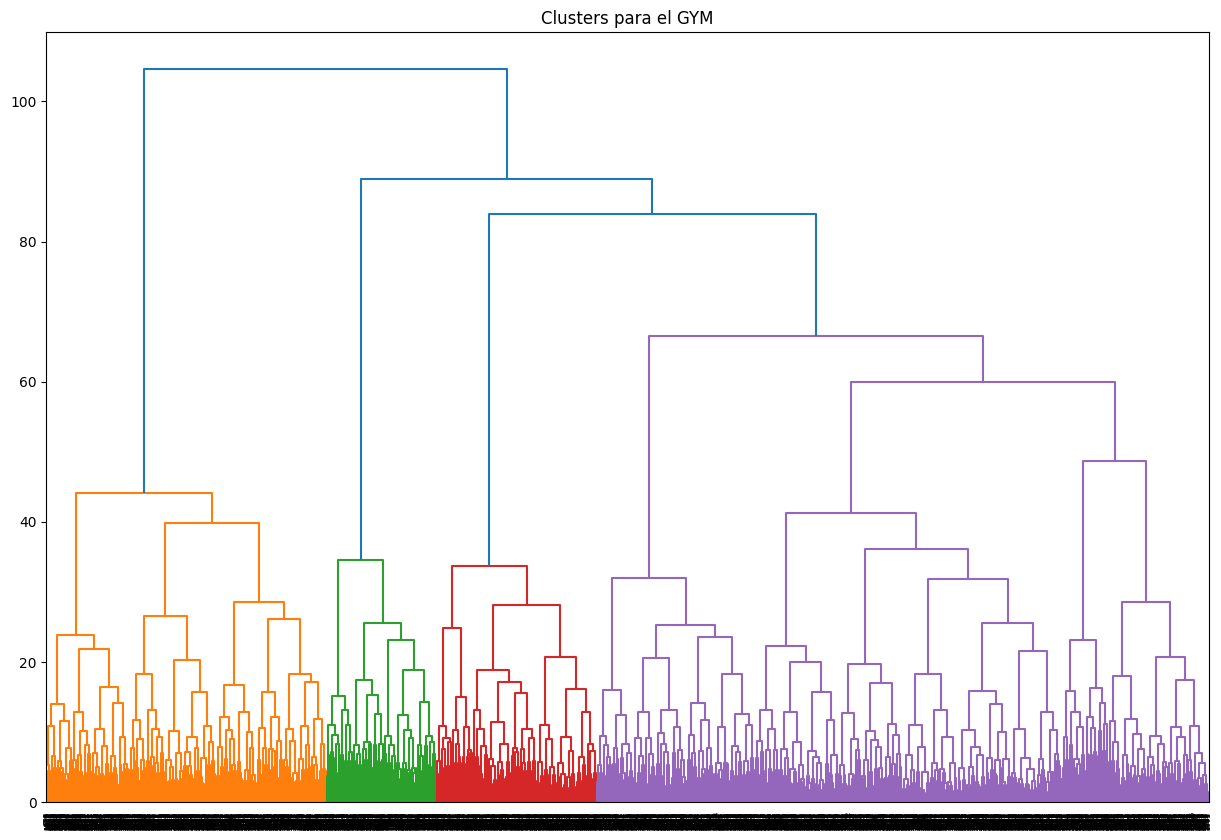

In [38]:
# trazar un dendrograma
plt.figure(figsize=(15,10))
dendrogram(linked, orientation = 'top')
plt.title('Clusters para el GYM')
plt.show();

In [39]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(model_fitness.drop(columns=['Churn']))

In [40]:
# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
model_fitness['cluster_km'] = labels

In [41]:
model_fitness.groupby(['cluster_km']).count()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029
1,962,962,962,962,962,962,962,962,962,962,962,962,962,962
2,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032
3,706,706,706,706,706,706,706,706,706,706,706,706,706,706
4,271,271,271,271,271,271,271,271,271,271,271,271,271,271


In [42]:
#valores medios de característica para los clústeres
gmf=model_fitness.groupby(['cluster_km']).mean()
gmf


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.514091,0.839650,0.451895,0.279883,0.897959,4.301263,0.407191,28.973761,105.932804,3.996113,3.544218,1.852564,1.708264,0.334305
1,0.511435,0.844075,0.495842,0.320166,0.902287,4.755717,0.423077,29.401247,174.873445,4.376299,3.749480,1.895200,1.785569,0.226611
2,0.508721,0.824612,0.488372,0.293605,0.907946,4.198643,0.387597,28.908915,35.600722,3.855620,3.394380,1.836755,1.692641,0.349806
3,0.521246,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470
4,0.468635,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280


los usuarios del cluster 4 tienen mas frecuencia o consumo y deuda mientras lodel cluster 3 no tanto

In [43]:
def graficos_generaL(x, group_col, key_col ):
    x_new=x.copy()
    x_new[key_col]=model_fitness[key_col]

    unique_clusters=x[group_col].unique()
    colors=sns.color_palette('husl',len(unique_clusters))
    color_dict=dict(zip(unique_clusters,colors))
    
    for c in key_col:
        for cl in x[group_col].unique():
            sns.histplot(
                x_new[x_new[group_col]==cl][c],
                label='{} = {}'.format(group_col,str(cl)),
                bins=10,
                kde=True,
                color=color_dict[cl],
                alpha=0.5)
        plt.title(c)
        plt.legend()
        plt.show()

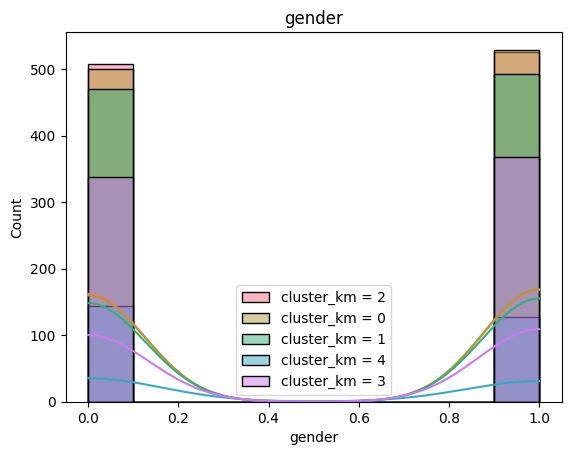

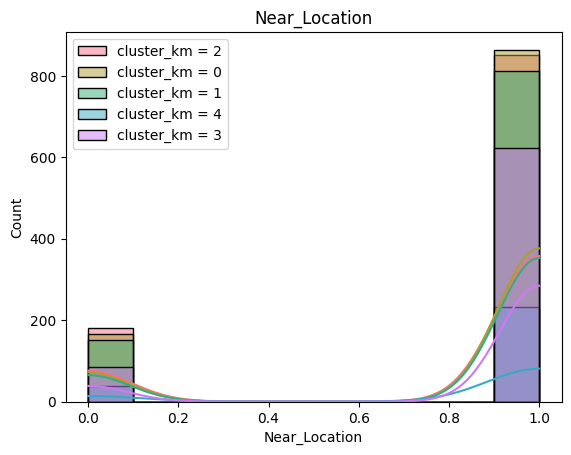

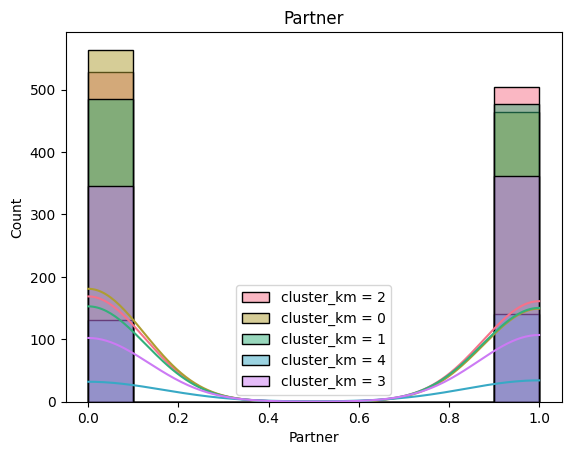

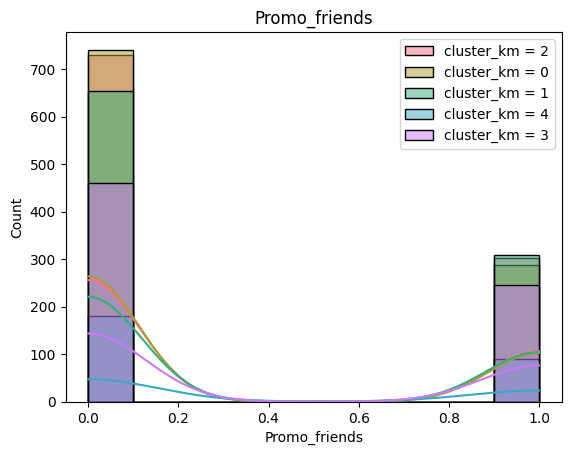

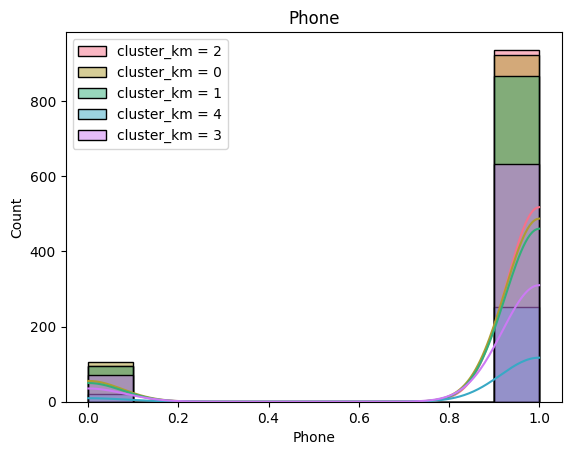

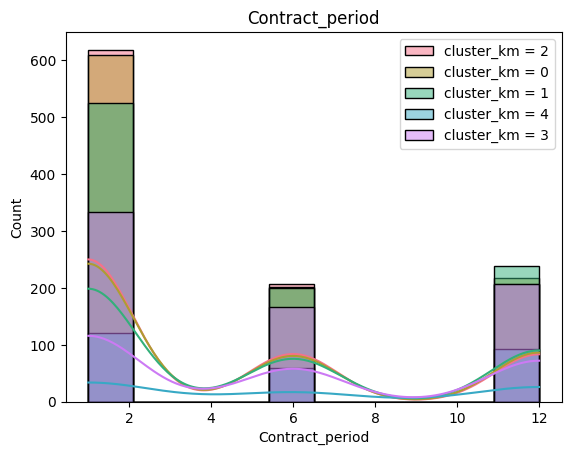

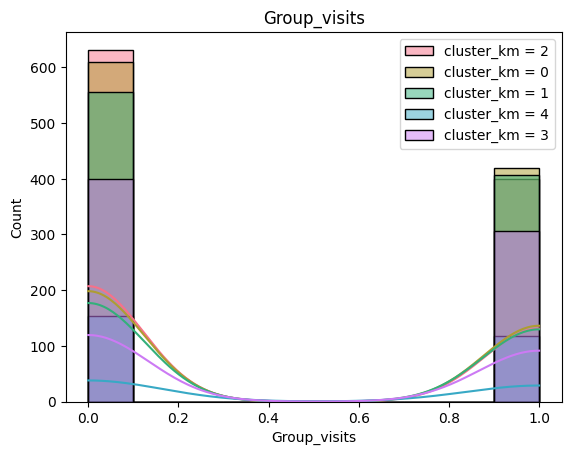

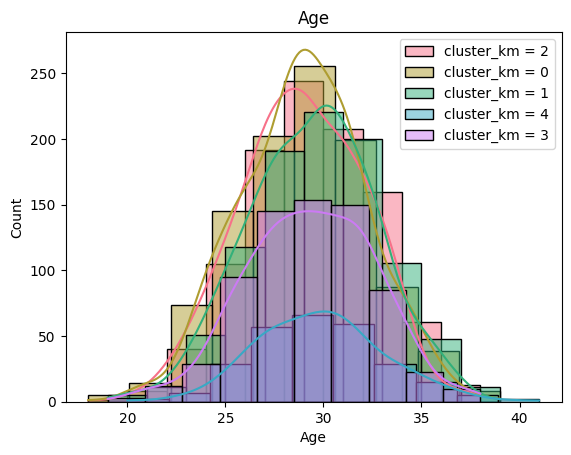

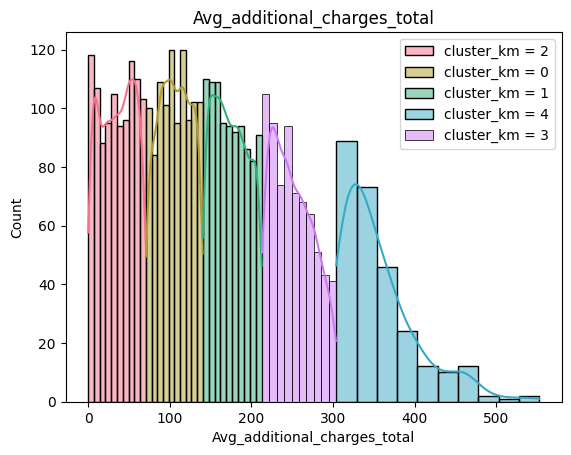

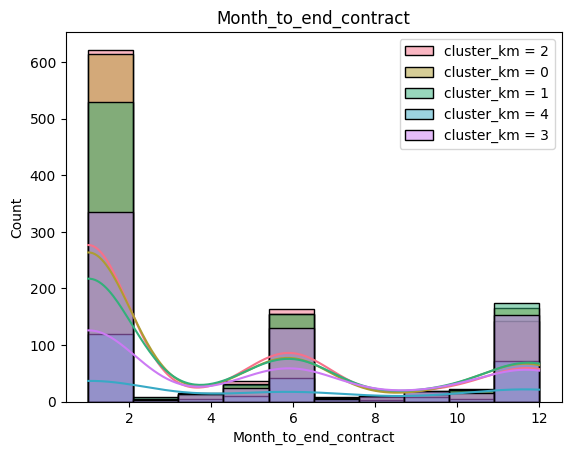

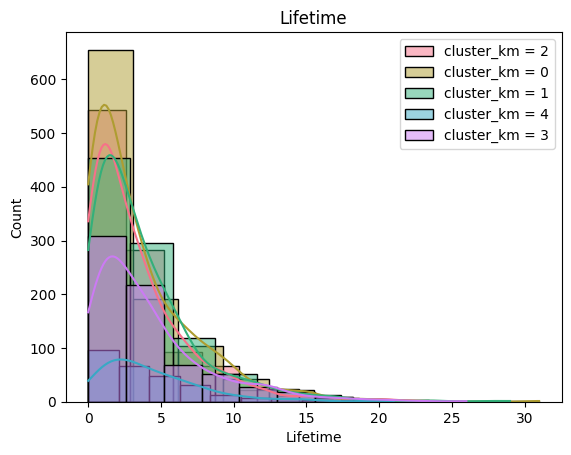

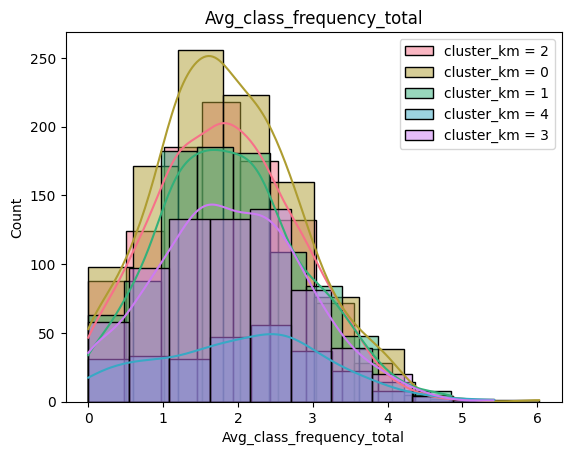

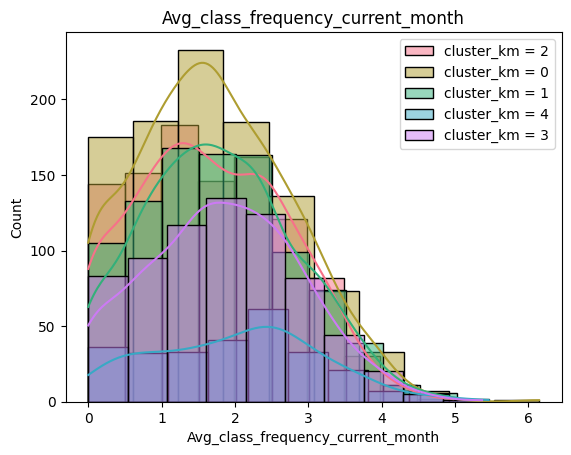

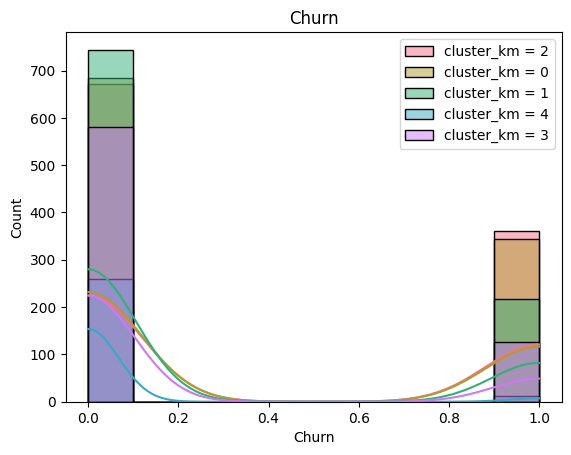

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


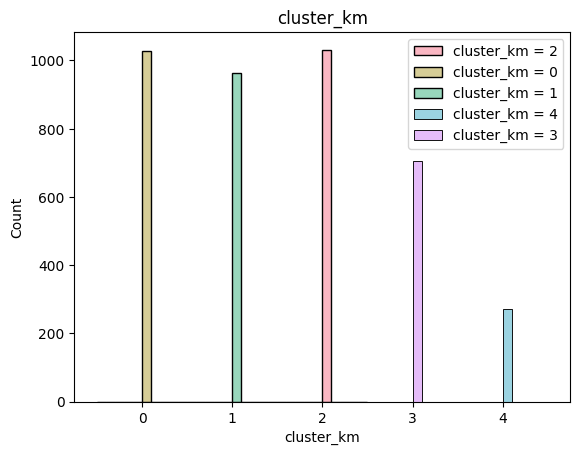

In [44]:
graficos_generaL(model_fitness, 'cluster_km',model_fitness.columns)

<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Count'>

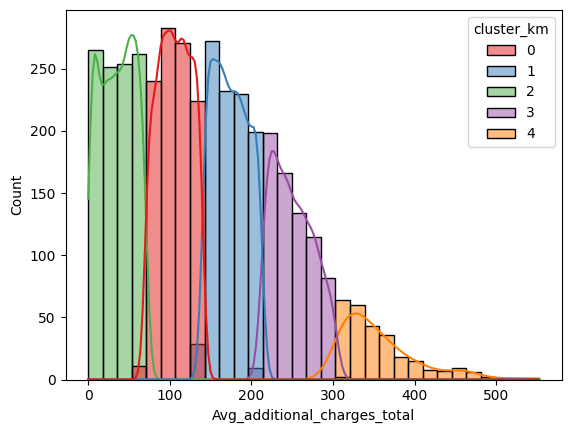

In [45]:
sns.histplot(
            data=model_fitness,
            x='Avg_additional_charges_total',
            hue='cluster_km',
            kde=True,
            palette='Set1'
)


<AxesSubplot:xlabel='cluster_km', ylabel='Age'>

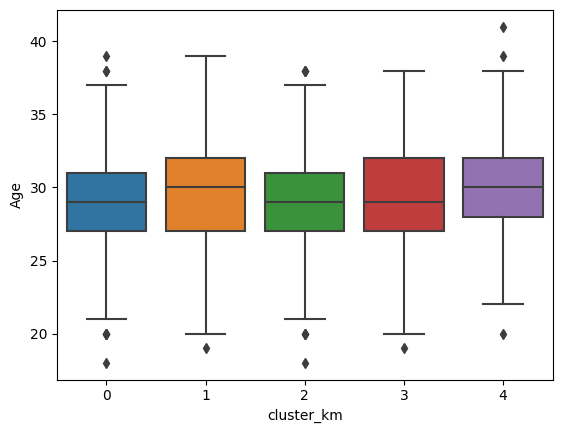

In [46]:
sns.boxplot( data=model_fitness,
           x='cluster_km',
           y='Age')

Variables:

['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'month_to_end_contract']

<AxesSubplot:xlabel='Age', ylabel='Count'>

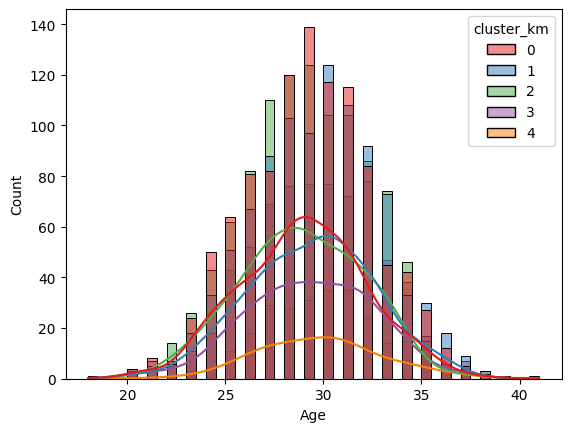

In [47]:

sns.histplot(
            data=model_fitness,
            x='Age',
            hue='cluster_km',
            kde=True,
            palette='Set1'

    )



<AxesSubplot:xlabel='gender', ylabel='count'>

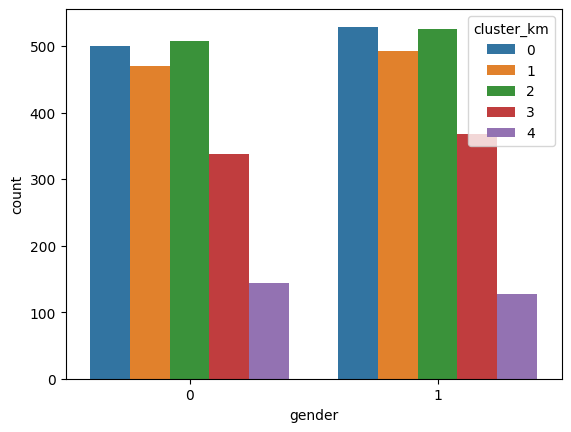

In [48]:

sns.countplot(
            data=model_fitness,
            x='gender',
            hue='cluster_km',

        )


<AxesSubplot:xlabel='Churn', ylabel='count'>

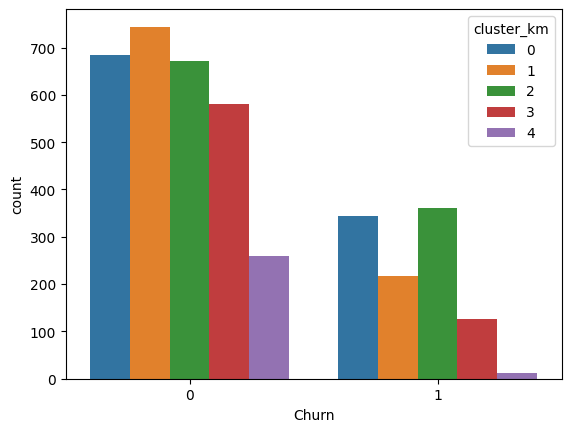

In [49]:
sns.countplot(
            data=model_fitness,
            x='Churn',
            hue='cluster_km',
        )


<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Count'>

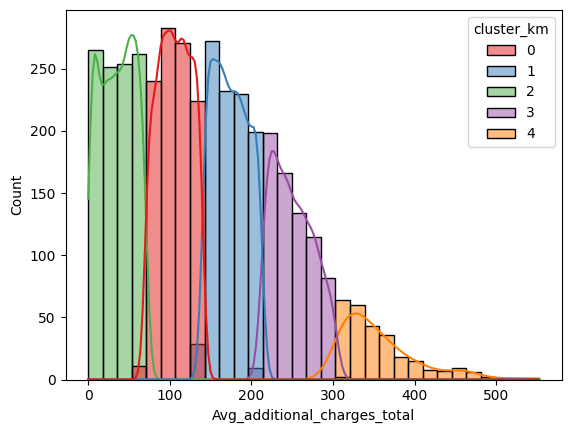

In [50]:
 sns.histplot(
            data=model_fitness,
            x='Avg_additional_charges_total',
            hue='cluster_km',
            kde=True,
            palette='Set1'
     )

<AxesSubplot:xlabel='Contract_period', ylabel='Count'>

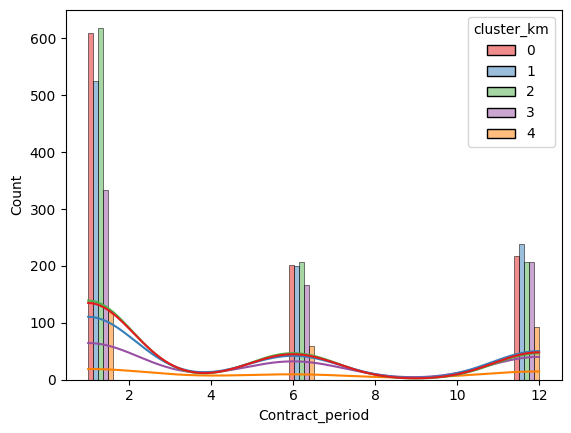

In [51]:
sns.histplot(
            data=model_fitness,
            x='Contract_period',
            hue='cluster_km',
            multiple='dodge',
            kde=True,
            palette='Set1'
        )


<AxesSubplot:xlabel='Month_to_end_contract', ylabel='Count'>

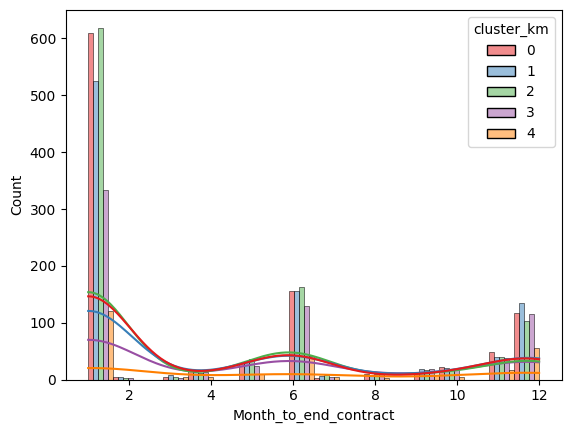

In [52]:


sns.histplot(
            data=model_fitness,
            x='Month_to_end_contract',
            hue='cluster_km',
            multiple='dodge',
            kde=True,
            palette='Set1'

    )




<AxesSubplot:xlabel='Promo_friends', ylabel='Count'>

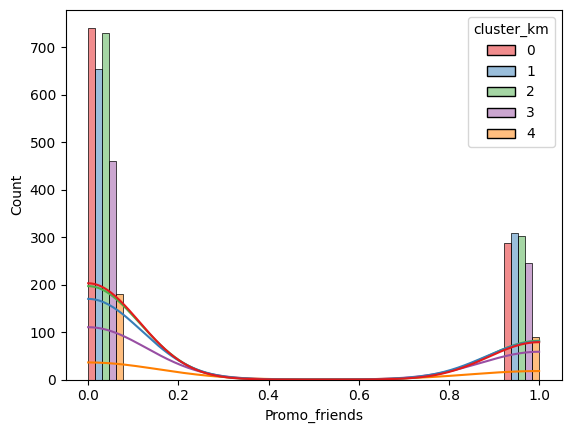

In [53]:
sns.histplot(
            data=model_fitness,
            x='Promo_friends',
            hue='cluster_km',
            multiple='dodge',
            kde=True,
            palette='Set1'

    )


In [54]:
model_fitness.groupby('cluster_km')['Churn'].mean()

cluster_km
0    0.334305
1    0.226611
2    0.349806
3    0.178470
4    0.044280
Name: Churn, dtype: float64

## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes


## Factores más relacionados con la cancelación:


duración de contrato.


Frecuencia baja en el mes actual.


Poca antigüedad (lifetime).


Gastos adicionales bajos (no usan otros servicios). = $ la recomdacion es que hay que promoverles pomociones exclusivas temporales para engancharlos$


## Clientes más leales:


Los que toman clases grupales.


Aquellos con contrato anual.


$Usuarios con alta frecuencia de asistencia.
= en estos usuarios lo recomdacion es venderle mas servicios internos$

## Clústeres propensos a irse:


Clústeres con baja frecuencia, contrato corto y pocos meses de relación.=$ estos son nesesarios identificarlos en el momento inicial para analisar la razon de por que se van rapido$


Poca participación en servicios adicionales.

=$la recomendacion en estos requiere analisis de que servicio desean para que sean mas permanentes$